In [68]:
# !pip install ezdxf
import ezdxf
import os

# Get path to work space with os
dir_path = os.path.realpath('.')

# Load the DXF document
doc = ezdxf.readfile(dir_path + "/dxf_files/Points_Test.dxf")
# Get the modelspace which contains the entities
modelspace = doc.modelspace()

# Print Cell visualization for data grid conversion
# Filament Extruder default size 1.75mm
cell_size = 1.75 # mm
# Build volume size 21.5 inch x 21.5 inch x 20 inch
build_dim = 21.5 * 25.4 # in to mm
# Create a grid of cells

# Open the output file
with open(dir_path + "/csv_files/coordinates.csv", "w") as file:
    # Write the headers to the file
    file.write("X,Y,Z\n")
    
    # Iterate over each entity in the modelspace
    for entity in modelspace:
        # Check if the entity is a line
        if entity.dxftype() == 'LINE':
            # Lets actually just record the start and end points
            file.write(f"{entity.dxf.start.x},{entity.dxf.start.y},{entity.dxf.start.z}\n")
            file.write(f"{entity.dxf.end.x},{entity.dxf.end.y},{entity.dxf.end.z}\n")
            
            # Depreciated code
            # # convert start and end points to a full line with n number of points
            # # the number of points is spaced out evenly between the start and end by the cell size
            # points = int(entity.dxf.start.distance(entity.dxf.end) / cell_size)
            # x = entity.dxf.start.x
            # y = entity.dxf.start.y
            # z = entity.dxf.start.z
            # dx = (entity.dxf.end.x - entity.dxf.start.x) / points
            # dy = (entity.dxf.end.y - entity.dxf.start.y) / points
            # dz = (entity.dxf.end.z - entity.dxf.start.z) / points
            # for i in range(points):
            #     file.write(f"{x},{y},{z}\n")
            #     x += dx
            #     y += dy
            #     z += dz

X: 4.668050046477999 to 12.136930865900856
Y: 5.352697202137539 to 33.85892297540392


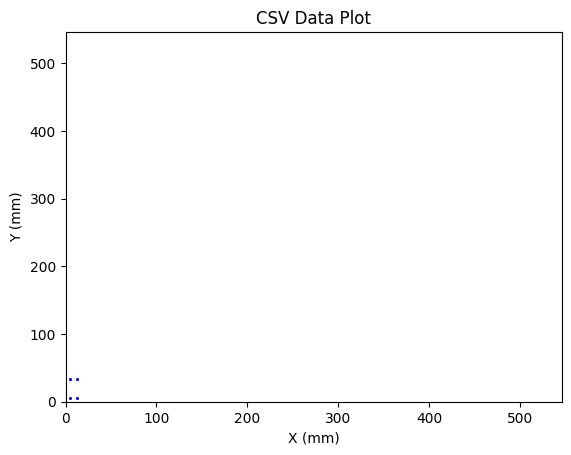

{1: (0, 0), 2: (0, 1), 3: (0, 2), 4: (0, 3), 5: (0, 4), 6: (0, 5), 7: (0, 6), 8: (0, 7), 9: (0, 8), 10: (0, 9), 11: (0, 10), 12: (0, 11), 13: (0, 12), 14: (0, 13), 15: (0, 14), 16: (0, 15), 17: (0, 16), 18: (0, 17), 19: (0, 18), 20: (0, 19), 21: (0, 20), 22: (0, 21), 23: (0, 22), 24: (0, 23), 25: (0, 24), 26: (0, 25), 27: (0, 26), 28: (0, 27), 29: (0, 28), 30: (0, 29), 31: (0, 30), 32: (0, 31), 33: (0, 32), 34: (0, 33), 35: (0, 34), 36: (0, 35), 37: (0, 36), 38: (0, 37), 39: (0, 38), 40: (0, 39), 41: (0, 40), 42: (0, 41), 43: (0, 42), 44: (0, 43), 45: (0, 44), 46: (0, 45), 47: (0, 46), 48: (0, 47), 49: (0, 48), 50: (0, 49), 51: (0, 50), 52: (0, 51), 53: (0, 52), 54: (0, 53), 55: (0, 54), 56: (0, 55), 57: (0, 56), 58: (0, 57), 59: (0, 58), 60: (0, 59), 61: (0, 60), 62: (0, 61), 63: (0, 62), 64: (0, 63), 65: (0, 64), 66: (0, 65), 67: (0, 66), 68: (0, 67), 69: (0, 68), 70: (0, 69), 71: (0, 70), 72: (0, 71), 73: (0, 72), 74: (0, 73), 75: (0, 74), 76: (0, 75), 77: (0, 76), 78: (0, 77), 79: 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Line Algorithm used to take the start and end points from the csv and generate the line in the grid space
def bresenham_line(x1, y1, x2, y2):
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    points.append((x, y))
    return points

# Read the CSV file
data = pd.read_csv(dir_path + "/csv_files/coordinates.csv")

# Get the 'X' and 'Y' columns
x = data['X']
y = data['Y']

# convert x y coordinate data to cell size
x = x / cell_size
y = y / cell_size

# Get edges of x and y from the data above
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
print(f"X: {x_min} to {x_max}"
      f"\nY: {y_min} to {y_max}")

# Plot the data on a 2D XY plane (verify data is correct start and end points)
plt.scatter(x, y, color='blue',s=1)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.xlim(0, build_dim)
plt.ylim(0, build_dim)
plt.title('CSV Data Plot')
plt.show()

# Create a grid of cells (grid is generated to the size of the build volume)
grid = []
for i in range(int(build_dim / cell_size)):
    row = []
    for j in range(int(build_dim / cell_size)):
        row.append(0)
    grid.append(row)

# Generate a dictionary of grid coordinates
dict = {}
count = 1
for i in range(len(grid)):
    for j in range(len(grid[0])):
        dict[count] = (i, j)
        count += 1        
print(dict)

# Fill in grid with lines from the data
for i in range(1, len(data), 2):
    x1 = int(data['X'][i-1] / cell_size)
    y1 = int(data['Y'][i-1] / cell_size)
    x2 = int(data['X'][i] / cell_size)
    y2 = int(data['Y'][i] / cell_size)
    # update grid with line
    for point in bresenham_line(x1, y1, x2, y2):
        grid[point[0]][point[1]] = 1
        
# get dictionary keys from grid
keys = []
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 1:
            for key, value in dict.items():
                if value == (i, j):
                    keys.append(key)

# keys of the grid coordinates that have a line
print(keys)


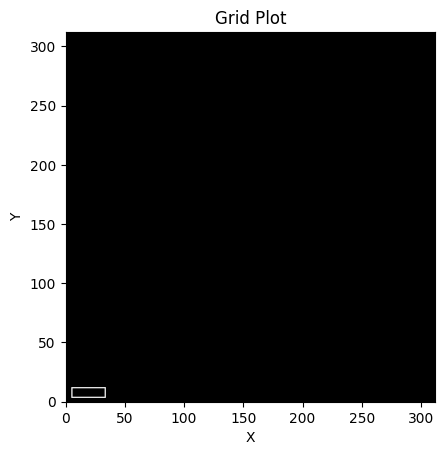

In [70]:
# Manually inject of toolpath using dictionary keys
# toolpath = [2550,2551,2552,2553,2554,2555,2556,2557,2558,2559,2560]
# manually provide keys for grid
# use dictionary to take the toolpath and convert to grid and append the grid with the toolpath
# for i in toolpath:
#     x, y = dict[i]
#     grid[x][y] = 1
    
# Use the keys to convert to grid
for i in keys:
    x, y = dict[i]
    grid[x][y] = 1
    # Can I use Bresenham's line algorithm here to clean up any missed points?

# Plot the grid to scale
plt.imshow(grid, cmap='gray', origin='lower')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, len(grid))
plt.ylim(0, len(grid[0]))
plt.title('Grid Plot')
plt.show()

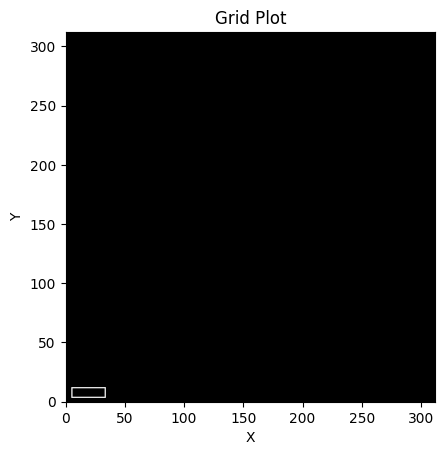

In [51]:
# This method does not use dictionary keys like te above method and is now depreciated as dictionary keys will make up the bulk of how we train the model

# # Iterate over each entity in the modelspace
# for entity in modelspace:
#     # Check if the entity is a line
#     if entity.dxftype() == 'LINE':
#         # Get the start and end points of the line
#         start = entity.dxf.start
#         end = entity.dxf.end
#         # Convert the start and end points to cell coordinates
#         start_x = int(start.x / cell_size)
#         start_y = int(start.y / cell_size)
#         end_x = int(end.x / cell_size)
#         end_y = int(end.y / cell_size)
#         # Bresenham's line algorithm
#         dx = abs(end_x - start_x)
#         dy = abs(end_y - start_y)
#         if start_x < end_x:
#             sx = 1
#         else:
#             sx = -1
#         if start_y < end_y:
#             sy = 1
#         else:
#             sy = -1
#         err = dx - dy
#         while True:
#             # Set the cell to 1
#             grid[start_x][start_y] = 1
#             if start_x == end_x and start_y == end_y:
#                 break
#             e2 = 2 * err
#             if e2 > -dy:
#                 err = err - dy
#                 start_x = start_x + sx
#             if e2 < dx:
#                 err = err + dx
#                 start_y = start_y + sy
    
# # Plot the grid to scale
# plt.imshow(grid, cmap='gray', origin='lower')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.xlim(0, len(grid))
# plt.ylim(0, len(grid[0]))
# plt.title('Grid Plot')
# plt.show()

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 5, 33, 5, 33, 5, 33, 5, 33, 5, 33, 5, 33, 5, 33, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
X: 4 to 12
Y: 5 to 33


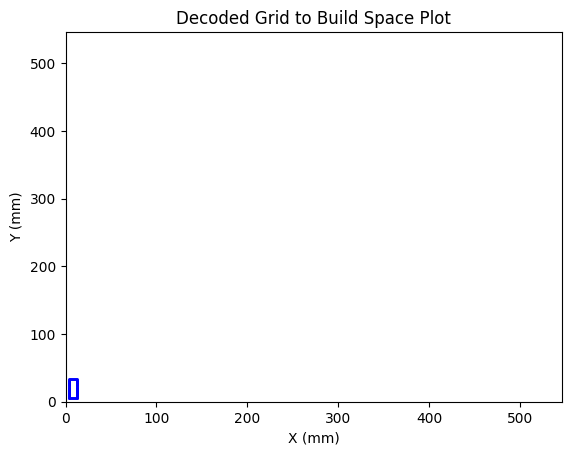

In [72]:
# the goal is to generate a workflow to create training data for a GPT model by feeding the model an array of grid locations that representa toolpath for a 3D printer
# The model will then use the training data to generate it's own toolpath for a 3D printer
# The model will be trained on the toolpath data
# toolpath data will be provided from dxf files
# convert dxf files to a grid of cells represented by ones and zeros
# with that grid extract the location of the ones for the model to train on
# the model will then generate it's own toolpath data


# decoding from grid
# get the x and y coordinates of the grid
x_vals = []
y_vals = []
locations = []
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 1:
            x_vals.append(i)
            y_vals.append(j)
print(x_vals)
print(y_vals)

# Get edges of x and y from the data above
x_min = min(x_vals)
x_max = max(x_vals)
y_min = min(y_vals)
y_max = max(y_vals)
print(f"X: {x_min} to {x_max}"
      f"\nY: {y_min} to {y_max}")

# Plot the data on a 2D XY plane
plt.scatter(x_vals, y_vals, color='blue', s=1)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.xlim(0, build_dim)
plt.ylim(0, build_dim)
plt.title('Decoded Grid to Build Space Plot')
plt.show()